In [ ]:
# Draw a map of Sh and Sb sampling locations

In [34]:
import os
# import vcf
from pathlib import Path
from matplotlib import pyplot as plt
# from matplotlib import cm
import pandas as pd
from matplotlib.pyplot import figure
# import glob
import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines
# import statistics
# import allel
# from collections import defaultdict
# from itertools import combinations
# from haversine import haversine
# from skbio.stats.distance import mantel
# from scipy.stats import ttest_ind
# import random
# import time
# import multiprocessing as mp



# # from haversine import haversine
import cartopy.crs as ccrs
import cartopy.feature as cf
# from pykrige.ok import OrdinaryKriging


In [35]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [36]:
info_df=pd.read_csv("{}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv".format(proj_dir), sep=",") 

In [37]:
Path("{}/sampling_maps".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/sampling_maps".format(results_dir))

In [38]:
#these are samples that passed filtering...need to do after initial pca
pca_df=pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")

In [45]:
df = pca_df[["sample_name", "lat", "lon", "pca_species", "country"]]

In [47]:
sh_df = df.loc[df["pca_species"] == "s_haematobium"]
sb_df = df.loc[df["pca_species"] == "s_bovis"]

In [53]:
missing = set(sh_df[sh_df['lat'].isna()]["country"].unique())

In [54]:
present = set(sh_df[~sh_df['lat'].isna()]["country"].unique())

In [55]:
missing.difference(present)

{'cameroon',
 'egypt',
 'gambia',
 'guineabissau',
 'kenya',
 'liberia',
 'mali',
 'senegal'}

In [ ]:
cameroon = [5.359846821839579, 12.83241583754397]
egypt = [26.79051859746806, 29.75135994720815]
gambia = [13.417174078240578, -15.468365084085413]
guineabissau = [12.217389596231383, -13.622661452252528]
kenya = [-0.0375919952015787, 35.50819643080273]
liberia = [6.3216131811123155, -8.65684105409062]
mali = [18.110125425188524, -2.108990737257369]
senegal = [14.525930151908192, -14.413677237868546]


In [44]:
sh_df

,sample_name,lat,lon,pca_species
9,Sh_NG_eb_6_2,6.328611,8.082222,s_haematobium
10,Sh_NG_ed_1_3,NaN,NaN,s_haematobium
11,Sh_NG_ed_3_2,NaN,NaN,s_haematobium
12,Sh_NG_kb_2_1,11.710000,4.052222,s_haematobium
13,Sh_NG_kw_1_10,8.892222,5.451389,s_haematobium
...,...,...,...,...
166,ssp_niger_libore_167,13.390080,2.197110,s_haematobium
167,ssp_niger_libore_168,13.390080,2.197110,s_haematobium
168,ssp_niger_libore_169,13.404170,2.188020,s_haematobium
169,ssp_niger_libore_173,13.404170,2.188020,s_haematobium


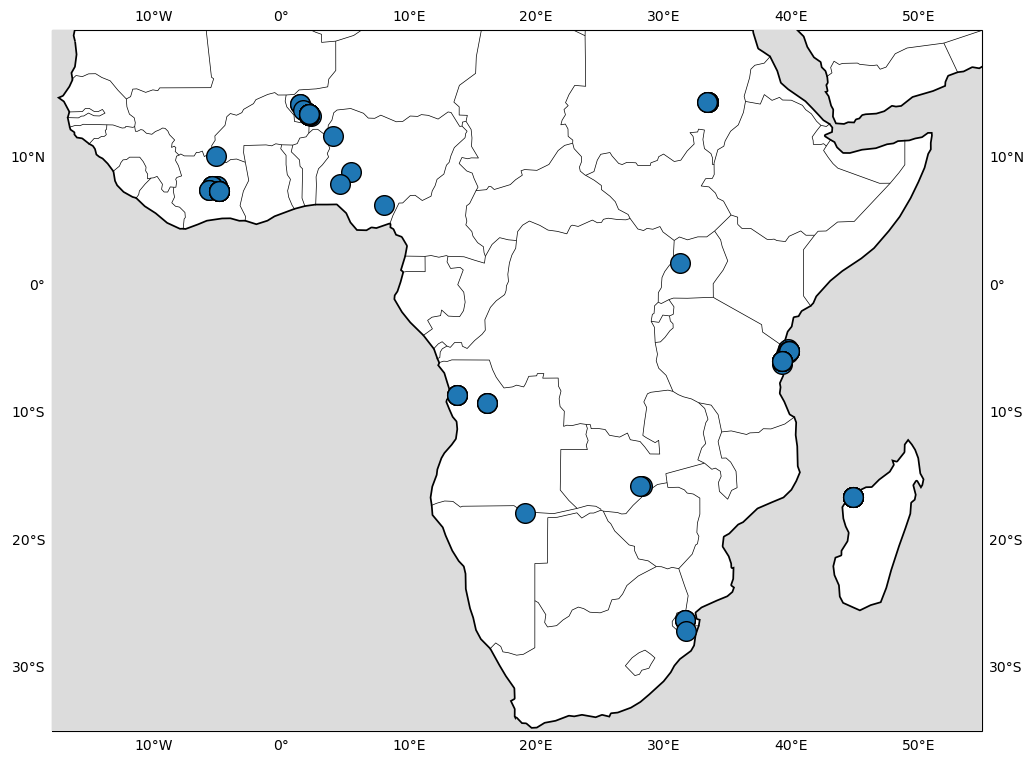

In [31]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sh_df["lon"], sh_df["lat"], marker='o', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 20])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sh_map.png', dpi=300)
plt.savefig('sh_map.svg')


plt.show()

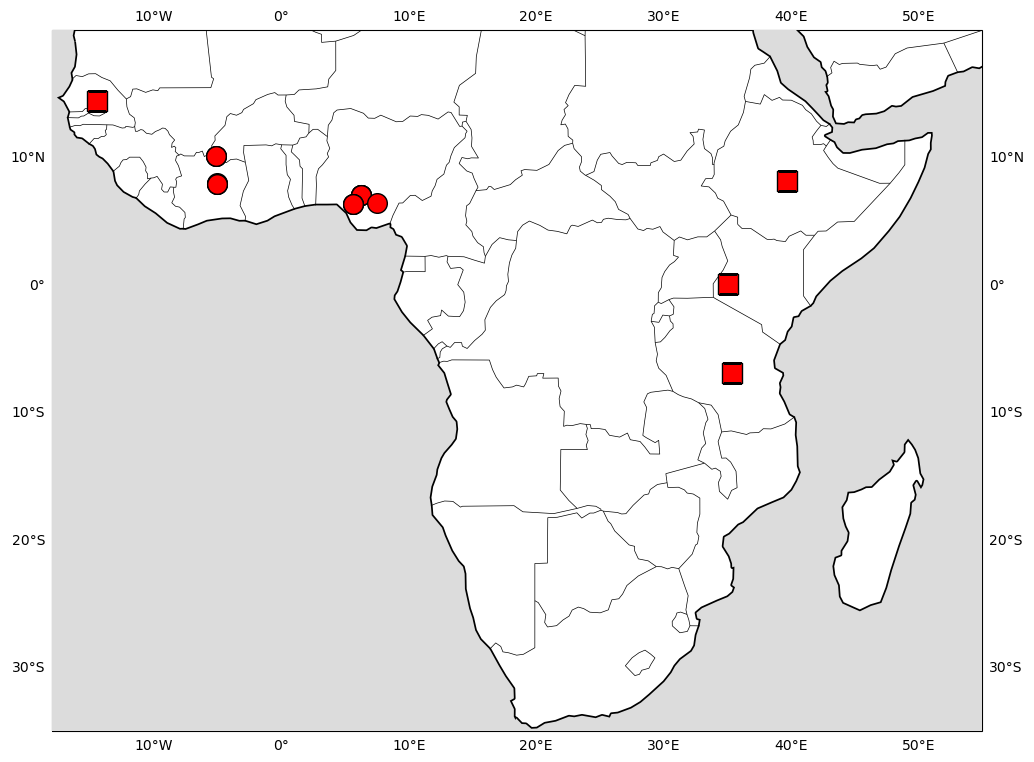

In [32]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sb_df["lon"], sb_df["lat"], marker='o', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )


ethiopia  = [8.196030504597621, 39.6830013610115]
kenya     = [0.09424373991248912, 35.02479861435154]
senegal   = [14.440832562834492, -14.50156852317904]
tanzania  = [-6.920119996988466, 35.332415709051126]
 
plt.scatter(ethiopia[1], ethiopia[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(kenya[1], kenya[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(senegal[1], senegal[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

plt.scatter(tanzania[1], tanzania[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 20])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sb_map.png', dpi=300)
plt.savefig('sb_map.svg')


plt.show()

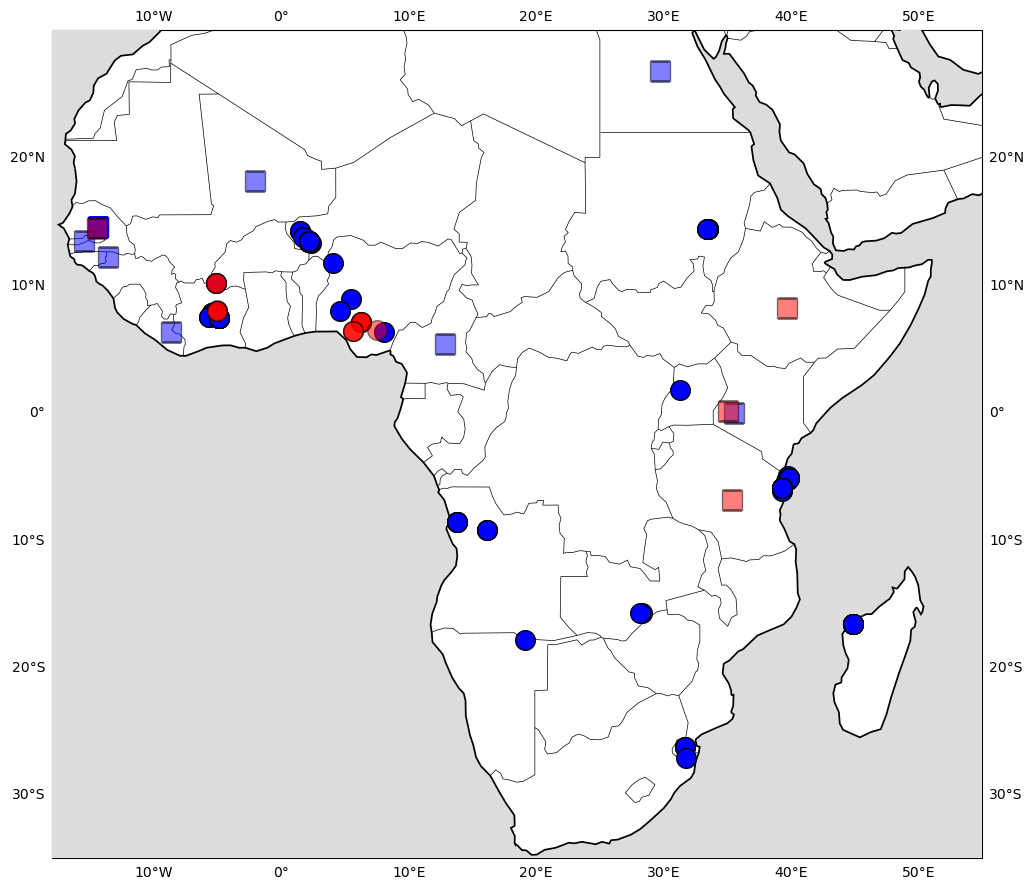

In [57]:
figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(sh_df["lon"], sh_df["lat"], marker='o', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=1, zorder=10, color="blue"
         )


cameroon = [5.359846821839579, 12.83241583754397]
egypt = [26.79051859746806, 29.75135994720815]
gambia = [13.417174078240578, -15.468365084085413]
guineabissau = [12.217389596231383, -13.622661452252528]
kenya = [-0.0375919952015787, 35.50819643080273]
liberia = [6.3216131811123155, -8.65684105409062]
mali = [18.110125425188524, -2.108990737257369]
senegal = [14.525930151908192, -14.413677237868546]


plt.scatter(cameroon[1], cameroon[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )

plt.scatter(egypt[1], egypt[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(gambia[1], gambia[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(guineabissau[1], guineabissau[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(kenya[1], kenya[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(liberia[1], liberia[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(mali[1], mali[0], marker='s', s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10, color="blue"
         )
plt.scatter(senegal[1], senegal[0], marker='s', s = 200, linewidth=1, color="blue"
         )


plt.scatter(sb_df["lon"], sb_df["lat"], marker='o', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10
         )


ethiopia  = [8.196030504597621, 39.6830013610115]
kenya     = [0.09424373991248912, 35.02479861435154]
senegal   = [14.440832562834492, -14.50156852317904]
tanzania  = [-6.920119996988466, 35.332415709051126]
 
plt.scatter(ethiopia[1], ethiopia[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10
         )

plt.scatter(kenya[1], kenya[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10
         )

plt.scatter(senegal[1], senegal[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10
         )

plt.scatter(tanzania[1], tanzania[0], marker='s', color="red", s = 200, linewidth=1, edgecolor="black",
         transform=ccrs.Geodetic(), alpha=0.5, zorder=10
         )

ax.add_feature(cf.OCEAN, facecolor='gainsboro', zorder=4)

ax.coastlines(zorder=2, linewidth=2.5)
ax.add_feature(cf.BORDERS, edgecolor='black', zorder=4, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=5, color="white", alpha=0)


plt.xlim([-18, 55])
plt.ylim([-35, 30])

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sh_and_sb_map.png', dpi=300)
plt.savefig('sh_and_sb_map.svg')


plt.show()